In [40]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sb
import numpy


Data = pd.read_csv("reddit_train.csv",sep=",",usecols=[1,2])
Data = Data.sample(frac=1).reset_index(drop=True)

Test = pd.read_csv("reddit_test.csv",sep=",")
Test = Test.sample(frac=1).reset_index(drop=True)





Data.head(5)

,comments,subreddits
0,Not sure if that is a smart move. As americas ...,conspiracy
1,ISIS fighters are not so tough when it comes t...,worldnews
2,"You can smoke heaven from long as well, so a f...",GlobalOffensive
3,"If I remember correctly, you are automatically...",wow
4,"only time i use speed mods is to learn a ""slow...",movies


In [33]:
Data.shape

(70000, 2)

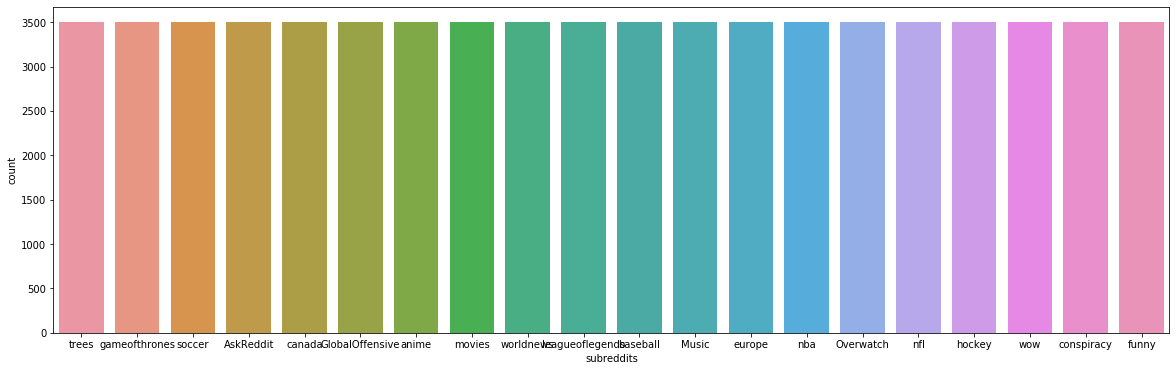

In [34]:
dims = (20, 6)
fig= plt.subplots(figsize=dims)
sb.countplot(x= 'subreddits' ,data=Data)

In [35]:
from nltk.corpus import stopwords
stopWords = set(stopwords.words('english'))
stopWords.add('URL')
stopWords.add('AT_USER')
print(stopWords)


{'to', 'hadn', 'your', 'why', 'than', 'ain', 'below', "doesn't", 'll', 'up', 'does', 'yourselves', "you'd", 'will', 'into', 'once', 'aren', 'was', 've', 'own', 'i', 'how', 'a', 'until', 'which', 'don', 'no', 'and', 'can', 'now', 'ma', "wasn't", 'those', 'themselves', 'any', 'you', 'by', 'haven', 're', 'isn', 'them', 'through', 'himself', 'while', 'mightn', 'theirs', "mightn't", 'here', 'being', 'most', 'she', 'do', 'his', 'of', 'yourself', 'doing', 'very', "aren't", "didn't", 'only', 'because', 'such', "weren't", 'he', 'what', 'him', "she's", 'other', 'whom', 'too', 'needn', 'we', 'that', 'all', "isn't", 'more', 'this', 'further', 'if', 'hasn', 'wouldn', 'm', 'd', "you'll", 'not', 'been', 'weren', 'both', 'myself', "don't", "you're", 'AT_USER', "hadn't", 'o', 'herself', 'my', 'between', 'their', 'be', 'just', 'ours', 'hers', 'am', 'where', 'me', 'or', 'then', "shan't", "shouldn't", "wouldn't", 'each', 'against', 'itself', 'doesn', 'won', 't', "it's", 'URL', 'has', 'some', 'so', "couldn

In [42]:
from sklearn import preprocessing
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

lemmatizer = WordNetLemmatizer()


def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

def lemmatize_sentence(sentence):
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            lemmatized_sentence.append(word)
        else:        
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)
#This lemmatization part is inspired by 'Lemmatize whole sentences with Python and nltk’s WordNetLemmatizer' see reference.
  

enc = preprocessing.LabelEncoder()

enc.fit(["nba","hockey","leagueoflegends","soccer","funny","movies","anime","Overwatch","trees","GlobalOffensive","nfl","AskReddit",
         "gameofthrones","conspiracy","worldnews","Music","wow","europe","canada","baseball"])



Data['comments']=Data['comments'].replace(to_replace=r'((www\.[^\s]+)|(https?://[^\s]+))', value='URL', regex=True)
Data['comments']=Data['comments'].replace(to_replace=r'@[^\s]+', value='AT_USER', regex=True)
Data['comments']=Data.apply(lambda row: lemmatize_sentence(row['comments']), axis=1)


X_train= Data['comments']
y_train= enc.transform(Data['subreddits'])
X_test= Test['comments']





In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer(stop_words=stopWords, ngram_range=(1, 3))
 

Xtrain=vec.fit_transform(X_train)
Xtest= vec.transform(X_test)

In [243]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=100)
XtrainSVD=svd.fit_transform(Xtrain)
XtestSVD=svd.transform(Xtest)

In [45]:
Xtrain

<70000x2228310 sparse matrix of type '<class 'numpy.float64'>'
	with 4117636 stored elements in Compressed Sparse Row format>